In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
url='https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/b4cf4ac187d647a443dc011c4ee85fbb42e26096/Dataset/D3.csv'

df = pd.read_csv(url)

# It shows the data of D3.csv but only for the first 5 rows
print(df.head())

         X1        X2        X3         Y
0  0.000000  3.440000  0.440000  4.387545
1  0.040404  0.134949  0.888485  2.679650
2  0.080808  0.829899  1.336970  2.968490
3  0.121212  1.524848  1.785455  3.254065
4  0.161616  2.219798  2.233939  3.536375


In [ ]:
from IPython.display import display
display(df)

,X1,X2,X3,Y
0,0.000000,3.440000,0.440000,4.387545
1,0.040404,0.134949,0.888485,2.679650
2,0.080808,0.829899,1.336970,2.968490
3,0.121212,1.524848,1.785455,3.254065
4,0.161616,2.219798,2.233939,3.536375
...,...,...,...,...
95,3.838384,1.460202,3.046061,-4.440595
96,3.878788,2.155152,3.494545,-4.458663
97,3.919192,2.850101,3.943030,-4.479995
98,3.959596,3.545051,0.391515,-3.304593


In [ ]:
# For ony the first column X1
X1 = df.values[:, 0] # First column X1
Y = df.values[:, 3]  # Fourth column Y
m = len(Y)  # Number of training examples
n = len(X1)  # Number of training examples

# It will show all the records and the total number of training examples
print('m = ', m)
print('n = ', n)
print('X1 = ', X1[: 100])
print('Y = ', Y[: 100])

m =  100
n =  100
X1 =  [0.         0.04040404 0.08080808 0.12121212 0.16161616 0.2020202
 0.24242424 0.28282828 0.32323232 0.36363636 0.4040404  0.44444444
 0.48484848 0.52525252 0.56565657 0.60606061 0.64646465 0.68686869
 0.72727273 0.76767677 0.80808081 0.84848485 0.88888889 0.92929293
 0.96969697 1.01010101 1.05050505 1.09090909 1.13131313 1.17171717
 1.21212121 1.25252525 1.29292929 1.33333333 1.37373737 1.41414141
 1.45454546 1.49494949 1.53535354 1.57575758 1.61616162 1.65656566
 1.6969697  1.73737374 1.77777778 1.81818182 1.85858586 1.8989899
 1.93939394 1.97979798 2.02020202 2.06060606 2.1010101  2.14141414
 2.18181818 2.22222222 2.26262626 2.3030303  2.34343434 2.38383838
 2.42424242 2.46464646 2.5050505  2.54545455 2.58585859 2.62626263
 2.66666667 2.70707071 2.74747475 2.78787879 2.82828283 2.86868687
 2.90909091 2.94949495 2.98989899 3.03030303 3.07070707 3.11111111
 3.15151515 3.19191919 3.23232323 3.27272727 3.31313131 3.35353535
 3.39393939 3.43434343 3.47474748 3.5151

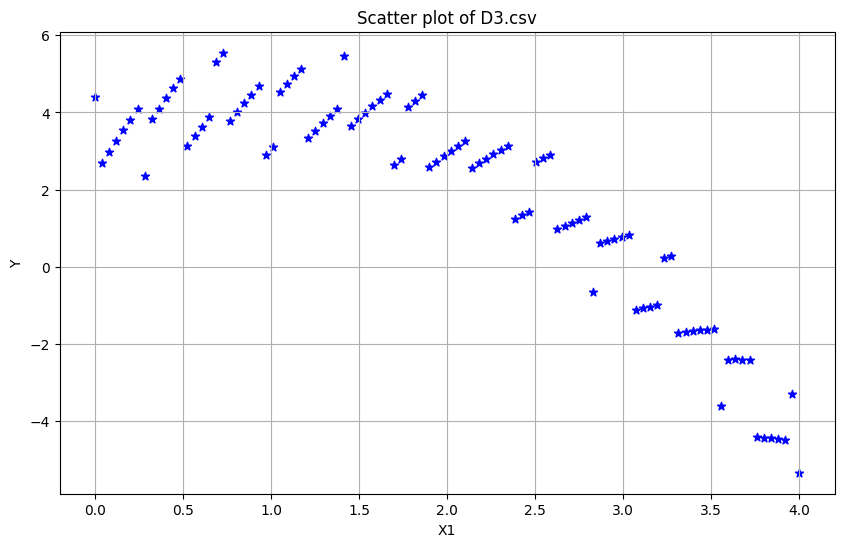

In [ ]:
X1 = df.values[:, 0]  # Input values from the first column
Y = df.values[:, 3]  # Output values from the fourth column

# Scatter plot
plt.scatter(X1, Y, color='blue', marker='*')

# Grid, labels, and title
plt.grid(True)
plt.rcParams["figure.figsize"] = (6, 6)
plt.xlabel('X1')
plt.ylabel('Y')
plt.title('Scatter plot of D3.csv')

# Show the plot
plt.show()

In [ ]:
X_1 = np.ones((m, 1))
X_1[:5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [ ]:
X1_1 = X1.reshape(m, 1)
X1_1[:10]

array([[0.        ],
       [0.04040404],
       [0.08080808],
       [0.12121212],
       [0.16161616],
       [0.2020202 ],
       [0.24242424],
       [0.28282828],
       [0.32323232],
       [0.36363636]])

In [ ]:
# It is the feature matrix for X1
X1 = np.hstack((X_1, X1_1))
X1[:5]


array([[1.        , 0.        ],
       [1.        , 0.04040404],
       [1.        , 0.08080808],
       [1.        , 0.12121212],
       [1.        , 0.16161616]])

In [ ]:
theta = np.zeros(2)
theta

array([0., 0.])

In [ ]:
def compute_cost(X1, Y, theta):

    X1predictions = X1.dot(theta)
    X1errors = np.subtract(X1predictions, Y)
    X1sqrErrors = np.square(X1errors)
    D = 1 / (2 * m) * np.sum(X1sqrErrors)
    return D

In [ ]:
# Cost for theta values
X1cost = compute_cost(X1, Y, theta)
print('The cost1 for given values of theta_0 and theta_1 =', X1cost)

The cost1 for given values of theta_0 and theta_1 = 5.524438459196242


In [ ]:
def gradient_descent(X1, Y, theta, alpha, X1iterations):

    m = len(Y)
    X1cost_history = np.zeros(X1iterations)

    for i in range(X1iterations):
        X1predictions = X1.dot(theta)
        X1errors = np.subtract(X1predictions, Y)
        X1sum_delta = (alpha / m) * X1.transpose().dot(X1errors)
        theta -= X1sum_delta
        X1cost_history[i] = compute_cost(X1, Y, theta)

    return theta, X1cost_history

In [ ]:
theta = [0., 0.]
X1iterations = 1500
alpha = 0.01

In [ ]:
theta, X1cost_history = gradient_descent(X1, Y, theta, alpha, X1iterations)
print('Final value of D3.csv =', theta)
print('cost_history =', X1cost_history)

Final value of D3.csv = [ 5.71850653 -1.9568206 ]
cost_history = [5.48226715 5.44290965 5.40604087 ... 0.99063932 0.99061433 0.99058944]


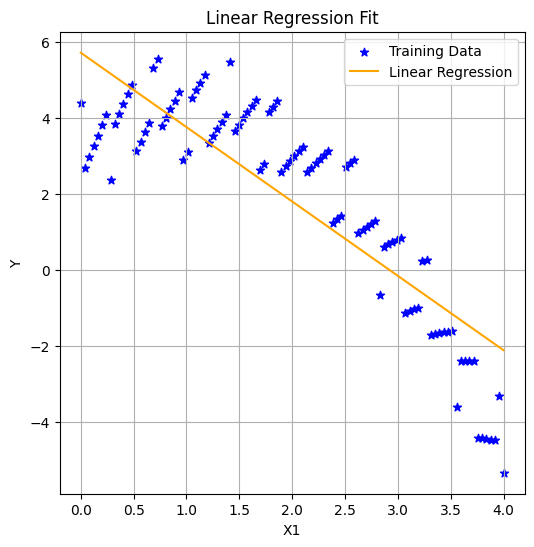

In [ ]:
# Scatter plot for the training data
plt.scatter(X1[:, 1], Y, color='blue', marker='*', label='Training Data')

# Line plot for the linear regression model
plt.plot(X1[:, 1], X1.dot(theta), color='orange', label='Linear Regression')

# Plot customizations
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)
plt.xlabel('X1')
plt.ylabel('Y')
plt.title('Linear Regression Fit')
plt.legend()

# Show the plot
plt.show()


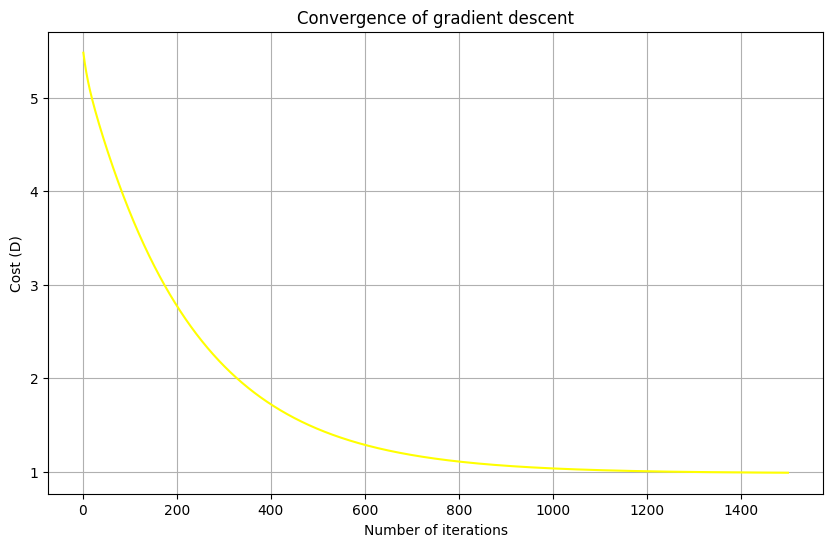

In [ ]:
plt.plot(range(1, X1iterations + 1), X1cost_history, color='yellow')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost (D)')
plt.title('Convergence of gradient descent')

# Show the plot
plt.show()

In [ ]:
# For ony the second column X2
X2 = df.values[:, 1] # Second column X2
Y = df.values[:, 3]  # Fourth column Y
m = len(Y)  # Number of training examples
o = len(X1)  # Number of training examples

# It will show all the records and the total number of training examples
print('m = ', m)
print('o = ', o)
print('X2 = ', X2[: 100])
print('Y = ', Y[: 100])

m =  100
o =  100
X2 =  [3.44       0.1349495  0.82989899 1.52484848 2.21979798 2.91474747
 3.60969697 0.30464646 0.99959596 1.69454546 2.38949495 3.08444444
 3.77939394 0.47434343 1.16929293 1.86424242 2.55919192 3.25414141
 3.94909091 0.6440404  1.3389899  2.03393939 2.72888889 3.42383838
 0.11878788 0.81373737 1.50868687 2.20363636 2.89858586 3.59353535
 0.28848485 0.98343434 1.67838384 2.37333333 3.06828283 3.76323232
 0.45818182 1.15313131 1.84808081 2.5430303  3.2379798  3.93292929
 0.62787879 1.32282828 2.01777778 2.71272727 3.40767677 0.10262626
 0.79757576 1.49252525 2.18747475 2.88242424 3.57737374 0.27232323
 0.96727273 1.66222222 2.35717172 3.05212121 3.74707071 0.4420202
 1.1369697  1.83191919 2.52686869 3.22181818 3.91676768 0.61171717
 1.30666667 2.00161616 2.69656566 3.39151515 0.08646465 0.78141414
 1.47636364 2.17131313 2.86626263 3.56121212 0.25616162 0.95111111
 1.64606061 2.3410101  3.0359596  3.73090909 0.42585859 1.12080808
 1.81575758 2.51070707 3.20565657 3.900

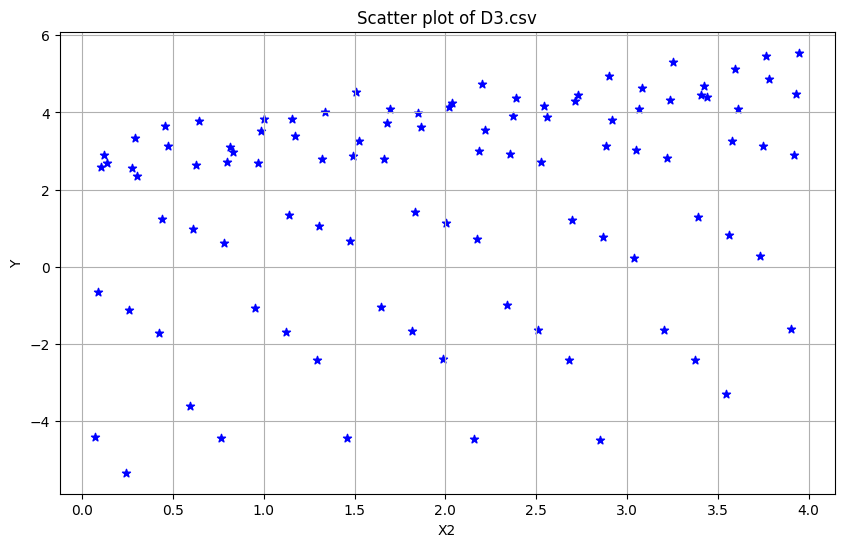

In [ ]:
X2 = df.values[:, 1]  # Input values from the second column
Y = df.values[:, 3]  # Output values from the fourth column

# Scatter plot
plt.scatter(X2, Y, color='blue', marker='*')

# Grid, labels, and title
plt.grid(True)
plt.rcParams["figure.figsize"] = (6, 6)
plt.xlabel('X2')
plt.ylabel('Y')
plt.title('Scatter plot of D3.csv')

# Show the plot
plt.show()

In [ ]:
X_2 = np.ones((m, 1))
X_2[:5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [ ]:
X2_1 = X2.reshape(m, 1)
X2_1[:10]

array([[3.44      ],
       [0.1349495 ],
       [0.82989899],
       [1.52484848],
       [2.21979798],
       [2.91474747],
       [3.60969697],
       [0.30464646],
       [0.99959596],
       [1.69454546]])

In [ ]:
# It is the feature matrix for X2
X2 = np.hstack((X_2, X2_1))
X2[:5]


array([[1.        , 3.44      ],
       [1.        , 0.1349495 ],
       [1.        , 0.82989899],
       [1.        , 1.52484848],
       [1.        , 2.21979798]])

In [ ]:
theta = np.zeros(2)
theta

array([0., 0.])

In [ ]:
def compute_cost(X2, Y, theta):

    X2predictions = X2.dot(theta)
    X2errors = np.subtract(X2predictions, Y)
    X2sqrErrors = np.square(X2errors)
    E = 1 / (2 * m) * np.sum(X2sqrErrors)
    return E

In [ ]:
# Cost for theta values
X2cost = compute_cost(X2, Y, theta)
print('The cost for given values of theta_0 and theta_1 =', X2cost)

The cost for given values of theta_0 and theta_1 = 5.524438459196242


In [ ]:
def gradient_descent(X2, Y, theta, alpha, X2iterations):

    m = len(Y)
    X2cost_history = np.zeros(X2iterations)

    for i in range(X2iterations):
        X2predictions = X2.dot(theta)
        X2errors = np.subtract(X2predictions, Y)
        X2sum_delta = (alpha / m) * X2.transpose().dot(X2errors)
        theta -= X2sum_delta
        X2cost_history[i] = compute_cost(X2, Y, theta)

    return theta, X2cost_history

In [ ]:
theta = [0., 0.]
X2iterations = 1500
alpha = 0.01

In [ ]:
theta, X2cost_history = gradient_descent(X2, Y, theta, alpha, X2iterations)
print('Final value of D3.csv =', theta)
print('cost_history =', X2cost_history)

Final value of D3.csv = [0.71988473 0.56390334]
cost_history = [5.29831663 5.09909109 4.92356115 ... 3.5993997  3.59939955 3.5993994 ]


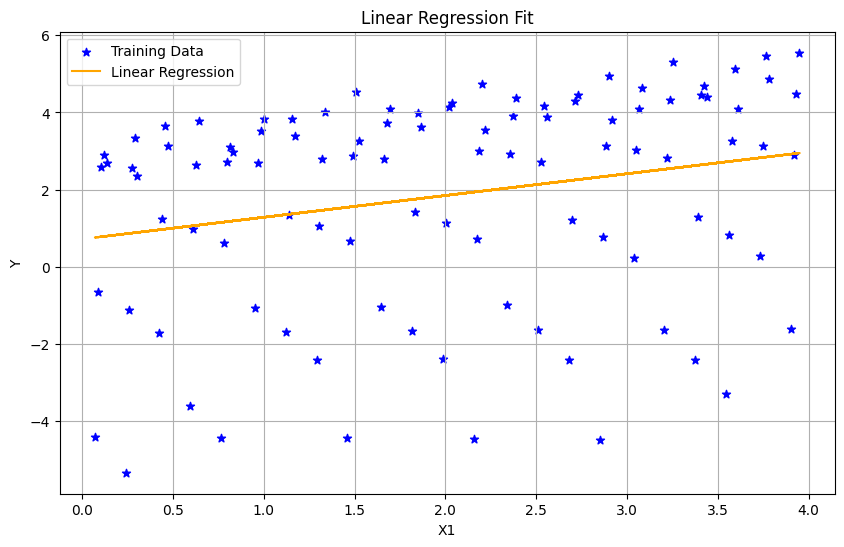

In [ ]:
# Scatter plot for the training data
plt.scatter(X2[:, 1], Y, color='blue', marker='*', label='Training Data')

# Line plot for the linear regression model
plt.plot(X2[:, 1], X2.dot(theta), color='orange', label='Linear Regression')

# Plot customizations
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)
plt.xlabel('X1')
plt.ylabel('Y')
plt.title('Linear Regression Fit')
plt.legend()

# Show the plot
plt.show()


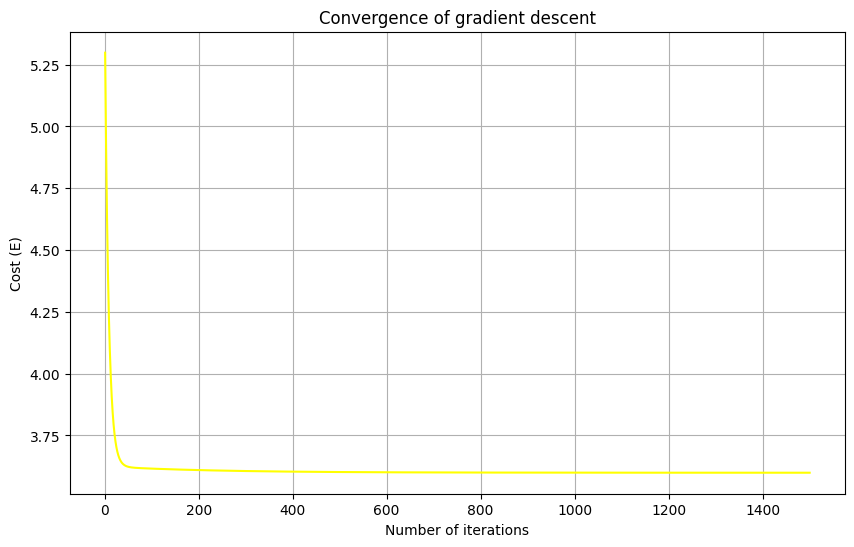

In [ ]:
plt.plot(range(1, X2iterations + 1), X2cost_history, color='yellow')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost (E)')
plt.title('Convergence of gradient descent')

# Show the plot
plt.show()

In [ ]:
# For ony the first column X3
X3 = df.values[:, 2] # Third column X3
Y = df.values[:, 3]  # Fourth column Y
m = len(Y)  # Number of training examples
P = len(X3)  # Number of training examples

# It will show all the records and the total number of training examples
print('m = ', m)
print('P = ', P)
print('X3 = ', X3[: 100])
print('Y = ', Y[: 100])

m =  100
P =  100
X3 =  [0.44       0.88848485 1.3369697  1.78545454 2.23393939 2.68242424
 3.13090909 3.57939394 0.02787879 0.47636364 0.92484849 1.37333333
 1.82181818 2.27030303 2.71878788 3.16727273 3.61575758 0.06424242
 0.51272727 0.96121212 1.40969697 1.85818182 2.30666667 2.75515152
 3.20363636 3.65212121 0.10060606 0.54909091 0.99757576 1.44606061
 1.89454546 2.3430303  2.79151515 3.24       3.68848485 0.1369697
 0.58545455 1.03393939 1.48242424 1.93090909 2.37939394 2.82787879
 3.27636364 3.72484848 0.17333333 0.62181818 1.07030303 1.51878788
 1.96727273 2.41575758 2.86424242 3.31272727 3.76121212 0.20969697
 0.65818182 1.10666667 1.55515151 2.00363636 2.45212121 2.90060606
 3.34909091 3.79757576 0.24606061 0.69454545 1.1430303  1.59151515
 2.04       2.48848485 2.9369697  3.38545454 3.83393939 0.28242424
 0.73090909 1.17939394 1.62787879 2.07636364 2.52484849 2.97333333
 3.42181818 3.87030303 0.31878788 0.76727273 1.21575758 1.66424242
 2.11272727 2.56121212 3.00969697 3.458

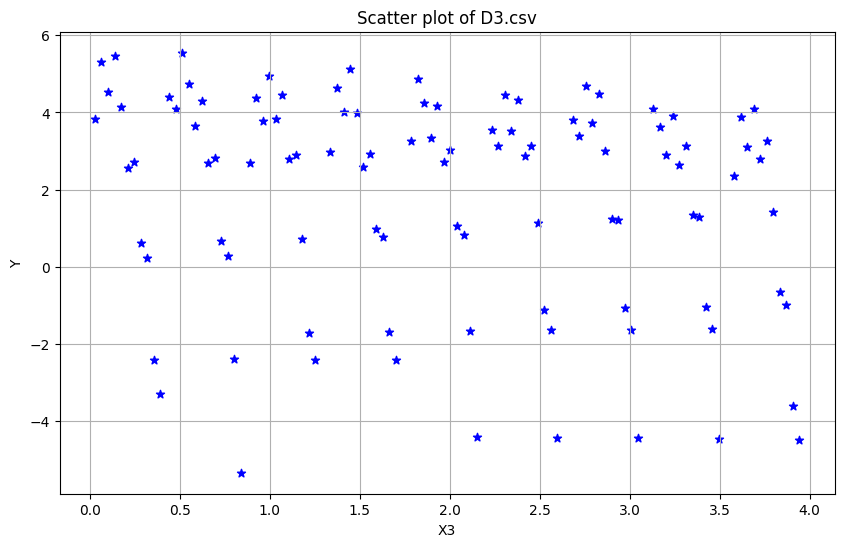

In [ ]:
X3 = df.values[:, 2]  # Input values from the third column
Y = df.values[:, 3]  # Output values from the fourth column

# Scatter plot
plt.scatter(X3, Y, color='blue', marker='*')

# Grid, labels, and title
plt.grid(True)
plt.rcParams["figure.figsize"] = (6, 6)
plt.xlabel('X3')
plt.ylabel('Y')
plt.title('Scatter plot of D3.csv')

# Show the plot
plt.show()

In [ ]:
X_3 = np.ones((m, 1))
X_3[:5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [ ]:
X3_1 = X3.reshape(m, 1)
X3_1[:10]

array([[0.44      ],
       [0.88848485],
       [1.3369697 ],
       [1.78545454],
       [2.23393939],
       [2.68242424],
       [3.13090909],
       [3.57939394],
       [0.02787879],
       [0.47636364]])

In [ ]:
# It is the feature matrix for X1
X3 = np.hstack((X_3, X3_1))
X3[:5]


array([[1.        , 0.44      ],
       [1.        , 0.88848485],
       [1.        , 1.3369697 ],
       [1.        , 1.78545454],
       [1.        , 2.23393939]])

In [ ]:
theta = np.zeros(2)
theta

array([0., 0.])

In [ ]:
def compute_cost(X3, Y, theta):

    predictions = X3.dot(theta)
    errors = np.subtract(predictions, Y)
    sqrErrors = np.square(errors)
    F = 1 / (2 * m) * np.sum(sqrErrors)
    return F

In [ ]:
# Cost for theta values
cost = compute_cost(X3, Y, theta)
print('The cost for given values of theta_0 and theta_1 =', cost)

The cost for given values of theta_0 and theta_1 = 5.524438459196242


In [ ]:
def gradient_descent(X3, Y, theta, alpha, iterations):

    m = len(Y)
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = X3.dot(theta)
        errors = np.subtract(predictions, Y)
        sum_delta = (alpha / m) * X3.transpose().dot(errors)
        theta -= sum_delta
        cost_history[i] = compute_cost(X3, Y, theta)

    return theta, cost_history

In [ ]:
theta = [0., 0.]
iterations = 1500
alpha = 0.01

In [ ]:
theta, cost_history = gradient_descent(X3, Y, theta, alpha, iterations)
print('Final value of D3.csv =', theta)
print('cost_history =', cost_history)

Final value of D3.csv = [ 2.78048129 -0.48451631]
cost_history = [5.40768785 5.30397076 5.21178297 ... 3.63053597 3.6305311  3.63052625]


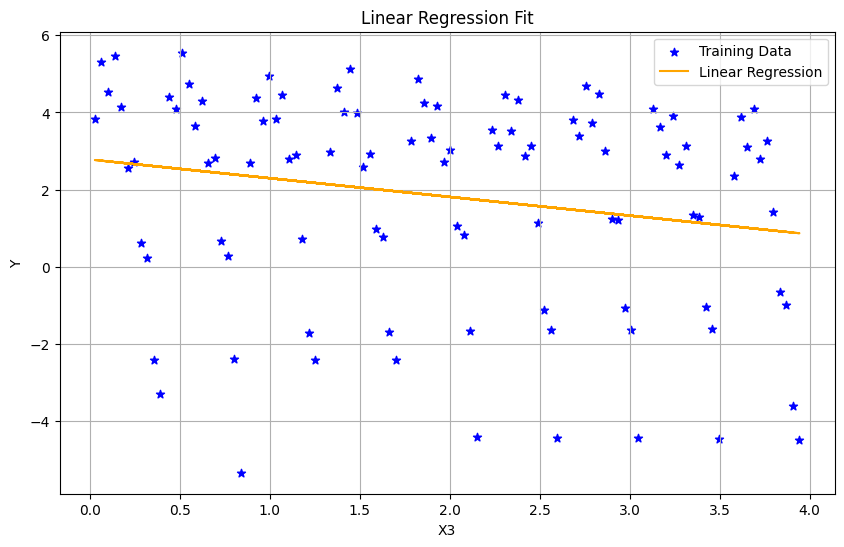

In [ ]:
# Scatter plot for the training data
plt.scatter(X3[:, 1], Y, color='blue', marker='*', label='Training Data')

# Line plot for the linear regression model
plt.plot(X3[:, 1], X3.dot(theta), color='orange', label='Linear Regression')

# Plot customizations
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)
plt.xlabel('X3')
plt.ylabel('Y')
plt.title('Linear Regression Fit')
plt.legend()

# Show the plot
plt.show()


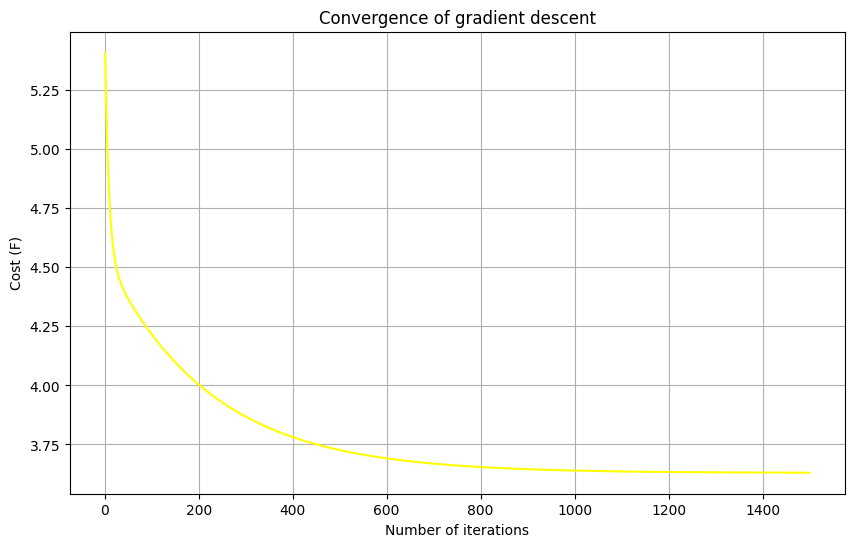

In [ ]:
plt.plot(range(1, iterations + 1), cost_history, color='yellow')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost (F)')
plt.title('Convergence of gradient descent')

# Show the plot
plt.show()